## <center><font color=navy>Algorithmic Trading in Python</font></center>
### <center>Regression Recap and Asset Pricing Models</center>
#### <center>Ali Habibnia</center>

For individuals who lack prior exposure to regression analysis:[A Refresher on Regression Analysis by Ali Habibnia](https://github.com/AliHabibnia/ECON_5314G_Big_Data_Economics/blob/main/Lecture%2001_Regression%20Recap%20with%20Examples.ipynb)

[What the Great Fama-Shiller Debate Has Taught Us](https://hbr.org/2013/10/what-the-great-fama-shiller-debate-has-taught-us)

[Empirical Asset Pricing: Eugene Fama, Lars Peter Hansen, and Robert Shiller](https://dash.harvard.edu/bitstream/handle/1/25142544/99130770.pdf)

[Fama-French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/index.html)

### Regression Models in Python:

Here's a list of popular Python libraries that can be used to estimate a linear regression model along with the specific function or class typically used to perform the regression:

1. Statsmodels
    - Library: statsmodels
    - Function/Class: statsmodels.api.OLS()
      
        
2. Scikit-learn
    - Library: sklearn
    - Function/Class: sklearn.linear_model.LinearRegression()
    

3. NumPy

    - Library: numpy
    - Function: numpy.polyfit() (with degree=1 for linear regression)
    

These are just a few libraries and there are others (i.e. TensorFlow (Using Keras API), PyTorch, ...) available. The choice of which to use often depends on the requirements of the specific task, familiarity with the library, and personal preference.

### Linear Regression Indicator and Regression Channels in Technical Analysis and Trading 

Befor we explore the mathematical and explanatory description of asset pricing models, let us first quickly review how traders use Linear Regression Indicator (LRI) and the Regression Channels in technical analysis. 

In the vast realm of technical analysis, the Linear Regression Indicator and Regression Channels stand out as powerful tools that offer traders both a perspective on trend direction and the potential volatility around that trend. At their core, these tools are rooted in statistical analysis, providing a quantifiable approach to market dynamics.


#### Regression channel

Channels are an important component of technical analysis. There are quite a few types of channel trading techniques that can be applied. Some of these include Fibonacci channel, Andrews pitchfork, and the Keltner channel. The linear regression channel is a three-line technical indicator, which outlines the high, the low, and the middle of a trend or price move being analyzed.

Upper Channel Line (UCL) and Lower Channel Line (LCL):

These are drawn a specified number (usually two) of standard deviations above and below the LRL, respectively. The space between the UCL and LCL represents the expected range of movement for the given asset based on its past volatility and trend. When prices move outside this channel, it might indicate overextension and a potential reversion to the mean.

In [ ]:
! pip install yfinance mplfinance pandas-ta> NUL

[*********************100%***********************]  1 of 1 completed


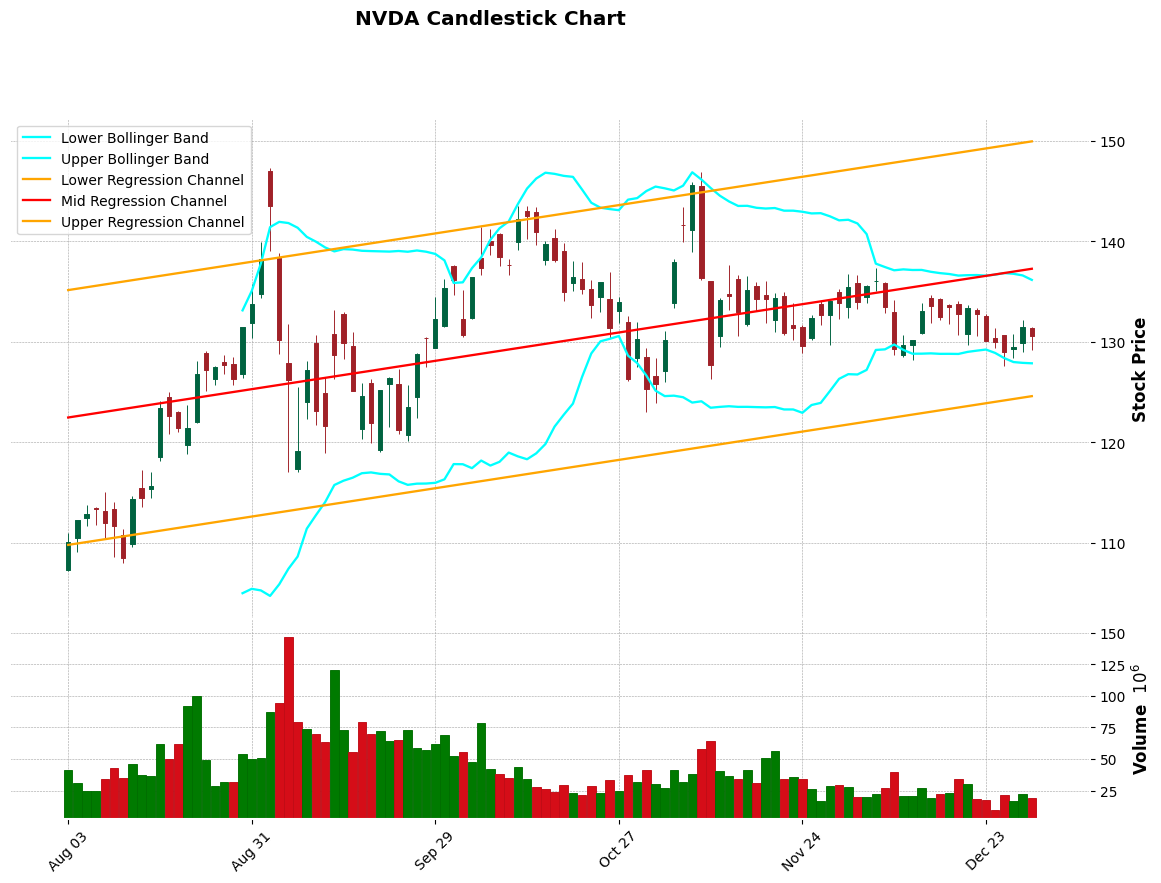

In [47]:

# Bollinger band and a regression channel together are used to develop trading strategies. 


import pandas as pd
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta
import numpy as np

# 1. Fetch NVIDIA stock data:
start_date = "2020-08-01"
end_date = "2021-01-01"
stock_symbol = "NVDA"

data = yf.download(stock_symbol, start=start_date, end=end_date)

# 2. Calculate Bollinger Bands using pandas-ta:
data.ta.bbands(close='Close', length=20, append=True)

# 3. Calculate Regression Channels:
x = np.array(range(len(data)))
y = data['Close'].values
slope, intercept = np.polyfit(x, y, 1)
data['Regression'] = slope*x + intercept

residuals = y - data['Regression']
std_error = np.std(residuals)

data['Upper Regression'] = data['Regression'] + (2 * std_error)
data['Lower Regression'] = data['Regression'] - (2 * std_error)

# 4. Plot candlestick chart with Bollinger Bands and Regression Channels:
ap = [
    mpf.make_addplot(data['BBL_20_2.0'].values, color='cyan', label='Lower Bollinger Band'),
    mpf.make_addplot(data['BBU_20_2.0'].values, color='cyan', label='Upper Bollinger Band'),
    mpf.make_addplot(data['Lower Regression'].values, color='orange', label='Lower Regression Channel'),
    mpf.make_addplot(data['Regression'].values, color='red', label='Mid Regression Channel'),
    mpf.make_addplot(data['Upper Regression'].values, color='orange', label='Upper Regression Channel')
]

mpf.plot(data, type='candle', style='charles', title=f"{stock_symbol} Candlestick Chart",
         ylabel='Stock Price', addplot=ap, volume=True, figsize=(15,10))

#### Linear Regression Indicator in Technical Analysis:

The Linear Regression Indicator plots the ending value of a Linear Regression Line for a specified number of bars; showing, statistically, where the price is expected to be. For example, a 20 period Linear Regression Indicator will equal the ending value of a Linear Regression line that covers 50 bars. The Linear Regression Indicator (LRI) can be calculated using the following formula:

LRI = (Ending Value of Linear Regression Line) / (Number of Bars)

The interpretation of the Linear Regression Indicator is similar to that of a moving average although it does have an advantage when compared to a moving average. Instead of plotting an average of past price action, it is plotting where a Linear Regression Line would expect the price to be, making the Linear Regression Indicator more responsive than a moving average.

[*********************100%***********************]  1 of 1 completed


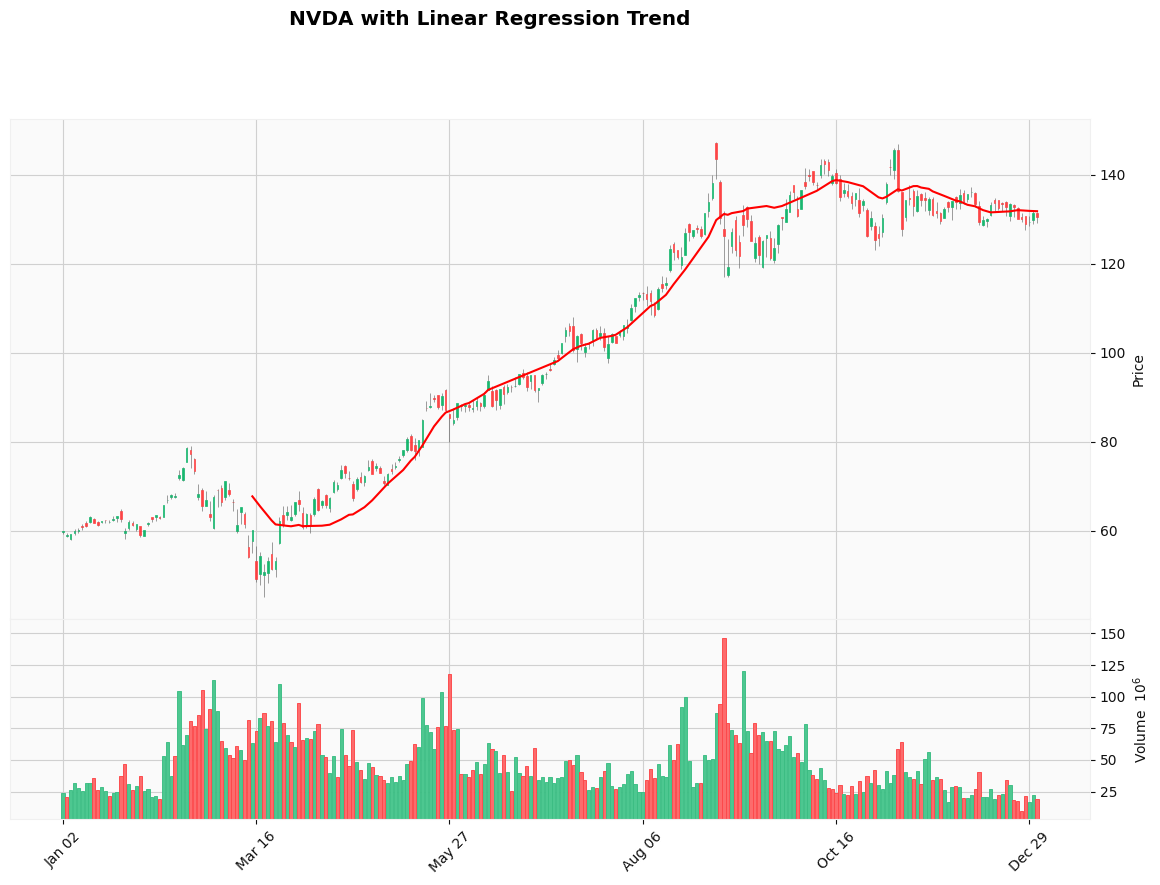

In [40]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import pandas_ta as ta

# 1. Fetch stock data:
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_symbol = "NVDA"

data = yf.download(stock_symbol, start=start_date, end=end_date)

# 2. Apply linear regression trend using pandas-ta:
linreg = ta.linreg(data["Close"],length=50)
data["LINREG"] = linreg

# Convert the index and LINREG column to numpy arrays
x_dates = data.index.to_numpy()
y_linreg = data["LINREG"].to_numpy()

# 3. Plot the candlestick chart with the regression trend:
ap = [
    mpf.make_addplot(y_linreg, color='red', width=1.5)
]

mpf.plot(data, type='candle', style='yahoo', addplot=ap, title=f"{stock_symbol} with Linear Regression Trend", volume=True, figsize=(15,10))


Now let's briefly explore the mathematical and explanatory description of key asset pricing models (i.e., CAPM, Fama-French 3 Factor, Fama-French 5 factor), and how to run these models in Python.

### Capital Asset Pricing Model (CAPM)

All finance students should have some knowledge of one of the most important topics in finance, that is the Capital Asset Pricing Model (CAPM). The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

The formula for calculating the expected return of an asset given its risk is as follows:

### $ r_i = r_f + \beta_i (r_m − r_f)$

where:


$r_i$ : The expected return of the investment in asset i. This can be the return of the any stock (i.e., Apple, Google, Tesla) or investment portfolio (i.e., any mutual/hedge fund portfolio).

$r_f$: The return of the risk-free asset. The risk-free asset is usually given by the US 3-month Treasury bill. It is assumed that the US government will not default on a short-term government security, thus the US 3-month Treasury bill is widely assumed in finance to be risk-free. 

$r_m$ : The return of the market. This is usually given by the S&P500 return as it is the largest market index in the world.

$(r_m − r_f)$ : Market risk premium


Investors expect to be compensated for risk and the time value of money. The risk-free rate in the CAPM formula accounts for the time value of money. The other components of the CAPM formula account for the investor taking on additional risk.

The beta of a potential investment is a measure of how much risk the investment will add to a portfolio that looks like the market. If a stock is riskier than the market, it will have a beta greater than one. If a stock has a beta of less than one, the formula assumes it will reduce the risk of a portfolio.

A beta coefficient can measure the volatility of an individual stock compared to the systematic risk of the entire market. In statistical terms, beta represents the slope of the line through a regression of data points. In finance, each of these data points represents an individual stock's returns against those of the market as a whole.

A stock’s beta is then multiplied by the market risk premium, which is the return expected from the market above the risk-free rate. The risk-free rate is then added to the product of the stock’s beta and the market risk premium. The result should give an investor the required return or discount rate they can use to find the value of an asset.

The goal of the CAPM formula is to evaluate whether a stock is fairly valued when its risk and the time value of money are compared to its expected return.


### Factor Investing and Fama-French model

#### FF3 Factor Asset Pricing Model

The Fama and French Three-Factor Model (or the Fama French Model for short) is an asset pricing model developed in 1992 that expands on the capital asset pricing model (CAPM) by adding size risk and value risk factors to the market risk factor in CAPM. This model considers the fact that value and small-cap stocks outperform markets on a regular basis. By including these two additional factors, the model adjusts for this outperforming tendency, which is thought to make it a better tool for evaluating manager performance. The model is essentially the result of an econometric regression of historical stock prices.

The Formula for the Fama French Model Is:

### $ r_{it} - r_{ft} = \alpha_{it} + \beta_1 (r_{mt} − r_{ft}) + \beta_2 SMB_t + \beta_3 HML_t + \epsilon_{it}$

$SMB$ : Size premium (small minus big)

$HML$ : Value premium (High minus low)


SMB accounts for traded companies with small market caps that generate higher returns, while HML accounts for value stocks with high book-to-market ratios that generate higher returns in comparison to the market.


#### FF5 Factor Asset Pricing Model

The theoretical starting point for the five-factor model is the dividend discount model as the model states that the value of a stock today is dependent upon future dividends. Fama and French use the dividend discount model to get two new factors from it, investment and profitability (Fama and French, 2014).

### $ r_{it} - r_{ft} = \alpha_{it} + \beta_1 (r_{mt} − r_{ft}) + \beta_2 SMB_t + \beta_3 HML_t + \beta_4 RMW_t + \beta_5 CMA_t + \epsilon_{it}$

$RMW$ : Return spread of the most profitable firms minus the least profitables

$CMA$ : Return spread of firms that invest conservatively minus aggressively



## Statistical Analysis with statsmodels

https://www.statsmodels.org

statsmodels provides a large range of cross-sectional models as well as some time-series models. Basic linear regression is provided by OLS. Estimating a model requires specifying the model and then calling a method to estimate the parameters (named fit in most models). 

In [1]:
! pip install yfinance > NUL
! pip install pandas-datareader --upgrade > NUL

In [6]:
import yfinance as yf
import bs4 as bs
import numpy as np
import os
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm # module for stats models
from statsmodels.iolib.summary2 import summary_col # module for presenting stats models outputs nicely
%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
### Historical Stock Price Data

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,6,30)
tickers=tickers+["SPY"];

data = yf.download(tickers, start=start, end=end)['Adj Close']

print(data)

[*********************100%***********************]  504 of 504 completed

5 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- OGN: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- CEG: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- BRK.B: No data found, symbol may be delisted
- GEHC: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
                    A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2006-01-03  20.400560  35.305664   38.423595   2.265983        NaN  16.258938   
2006-01-04  20.455357  36.955463   38.697315   2.272653        NaN  16.151209   
2006-01-05  20.991257  37.436260   38.882702   2.254768        NaN  15.951151   
2006-01-06  21.100876  36.766918   38.838551   2.312970        NaN  15.774172   
2006-01-09  21.039982  36.399254   39.341808   2.305391        NaN  15.774172   


In [8]:
if not os.path.exists('Stock_Data'):
    os.makedirs('Stock_Data')
data.to_csv('Stock_Data/SP500Prices.csv')

#data.to_hdf('Stock_Data/SP500Prices.h5', 'fixed', mode='w', complib='blosc', complevel=9)

In [9]:
cleaned_data = data.copy()

# Remove companies (columns) with all missing values for whole time range
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Remove days (rows) with missing values for all of companies
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Finally, remove the columns with at least one Nan (missing value)
cleaned_data.dropna(axis='columns', how='any', inplace=True)

cleaned_data

,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,20.400560,35.305664,38.423595,2.265983,16.258938,12.530259,6.120000,21.450239,38.520000,23.851408,...,64.403900,13.357165,29.625664,9.751626,32.048004,23.966692,12.062395,60.362865,42.830002,56.404537
2006-01-04,20.455357,36.955463,38.697315,2.272653,16.151209,12.549263,6.151111,21.567379,38.419998,24.072374,...,65.072762,13.679873,29.570749,9.798885,32.102802,24.188478,12.165599,60.935837,42.410000,56.802811
2006-01-05,20.991257,37.436260,38.882702,2.254768,15.951151,12.710846,6.061111,21.728443,38.070000,24.839266,...,64.087074,13.559610,29.395031,9.793634,31.943861,23.913458,12.684220,60.292362,42.529999,57.319096
2006-01-06,21.100876,36.766918,38.838551,2.312970,15.774172,12.954793,6.173333,22.804605,39.000000,24.936747,...,63.312599,13.579657,29.675089,9.830395,32.574192,24.286070,12.648103,59.983845,44.119999,57.916447
2006-01-09,21.039982,36.399254,39.341808,2.305391,15.774172,13.436364,6.116667,22.738722,38.380001,25.287697,...,65.882416,13.547583,31.075380,9.804136,32.557747,24.525604,12.746144,62.108185,44.790001,57.437077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,87.422417,14.000000,139.826126,89.843628,97.086075,86.546471,29.559999,198.269089,440.549988,116.737549,...,185.444489,19.926138,84.096046,58.997757,39.540314,43.215523,83.275253,119.415413,260.769989,31.866991
2020-06-24,84.758995,13.040000,133.327560,88.257690,94.541733,82.754738,28.450001,192.953873,431.679993,113.157280,...,182.452225,19.033527,74.841599,58.529015,37.677601,41.371834,81.987091,112.077583,250.500000,29.837135
2020-06-25,85.444443,13.170000,133.243652,89.429359,96.292152,84.953941,28.879999,207.752365,436.950012,113.753990,...,190.539932,19.243555,73.199677,57.812103,38.244884,41.429882,81.456696,109.309280,253.639999,30.762249


In [10]:
# This converts prices to arithmetic or log returns.

prices = cleaned_data.copy()
return_values = np.log(prices).diff().dropna()
print(return_values.shape)
return_values.head(10)

(3646, 417)


,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04 00:00:00,0.002682,0.045670,0.007098,0.002939,-0.006648,0.001515,0.005071,0.005446,-0.002599,0.009222,...,0.010332,0.023873,-0.001855,0.004835,0.001708,0.009211,0.008519,0.009447,-0.009855,0.007036
2006-01-05 00:00:00,0.025861,0.012926,0.004779,-0.007900,-0.012464,0.012794,-0.014740,0.007440,-0.009152,0.031361,...,-0.015263,-0.008830,-0.005960,-0.000536,-0.004963,-0.011435,0.041747,-0.010616,0.002826,0.009048
2006-01-06 00:00:00,0.005209,-0.018041,-0.001136,0.025485,-0.011157,0.019010,0.018346,0.048340,0.024135,0.003917,...,-0.012158,0.001477,0.009482,0.003746,0.019540,0.015462,-0.002852,-0.005130,0.036703,0.010368
2006-01-09 00:00:00,-0.002890,-0.010050,0.012874,-0.003282,0.000000,0.036499,-0.009222,-0.002893,-0.016025,0.013976,...,0.039787,-0.002365,0.046108,-0.002675,-0.000505,0.009815,0.007722,0.034803,0.015072,-0.008311
2006-01-10 00:00:00,0.012940,-0.021202,0.001122,0.061329,0.000243,-0.009715,0.006338,-0.021807,0.005975,0.000000,...,-0.010204,0.013228,0.001236,0.004809,0.007714,-0.008537,-0.000810,-0.004267,0.036607,-0.011753
2006-01-11 00:00:00,-0.000286,-0.082691,-0.008555,0.036906,-0.000243,-0.007095,0.003424,0.008193,0.018476,0.004871,...,-0.004599,-0.000585,0.029562,-0.007491,0.006826,0.022724,-0.008053,0.025749,-0.009516,0.005829
2006-01-12 00:00:00,-0.022252,0.005445,0.002935,0.004638,0.007774,-0.002175,-0.008128,-0.001634,0.003807,-0.008476,...,0.017471,-0.017686,-0.009469,0.010152,-0.010508,-0.001606,-0.016304,0.005955,0.010591,-0.015228
2006-01-13 00:00:00,-0.007627,-0.027232,0.000225,0.015306,0.002418,-0.003635,-0.005820,-0.012500,-0.016344,0.006428,...,-0.004807,-0.011516,0.009297,0.000532,0.022056,0.004988,-0.000208,-0.025453,-0.007554,0.010307
2006-01-17 00:00:00,-0.005907,-0.126633,-0.019573,-0.010335,-0.012389,-0.002917,-0.016183,0.020640,0.015330,-0.031236,...,-0.014564,0.001052,-0.025164,0.011096,0.009306,-0.004096,-0.012355,0.001416,-0.020132,-0.004814


In [11]:
def assetPriceReg(df_stk):
    import pandas_datareader.data as web  # module for reading datasets directly from the web
    
    # Reading in factor data
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
    df_factors['MKT'] = df_factors['MKT']/100
    df_factors['SMB'] = df_factors['SMB']/100
    df_factors['HML'] = df_factors['HML']/100
    df_factors['RMW'] = df_factors['RMW']/100
    df_factors['CMA'] = df_factors['CMA']/100
    
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
    df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns

    # Running CAPM, FF3, and FF5 models.
    CAPM = sm.ols(formula = 'XsRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF3 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    CAPMtstat = CAPM.tvalues
    FF3tstat = FF3.tvalues
    FF5tstat = FF5.tvalues

    CAPMcoeff = CAPM.params
    FF3coeff = FF3.params
    FF5coeff = FF5.params

    # DataFrame with coefficients and t-stats
    results_df = pd.DataFrame({'CAPMcoeff':CAPMcoeff,'CAPMtstat':CAPMtstat,
                               'FF3coeff':FF3coeff, 'FF3tstat':FF3tstat,
                               'FF5coeff':FF5coeff, 'FF5tstat':FF5tstat},
    index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])


    dfoutput = summary_col([CAPM,FF3, FF5],stars=True,float_format='%0.4f',
                  model_names=['CAPM','FF3','FF5'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'Adjusted R2':lambda x: "{:.4f}".format(x.rsquared_adj)}, 
                             regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    print(dfoutput)
    
    return results_df

In [12]:
df_stk = yf.download('NVDA', start=start, end=end)
df_stk.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,3.064167,3.208333,3.054167,3.185000,2.922242,47281200
2006-01-04,3.209167,3.279167,3.175833,3.274167,3.004054,51007200
2006-01-05,3.275000,3.354167,3.269167,3.348333,3.072100,64609200
2006-01-06,3.386667,3.415833,3.254167,3.403333,3.122564,62338800
2006-01-09,3.401667,3.516667,3.394167,3.498333,3.209726,56048400


<AxesSubplot:xlabel='Date'>

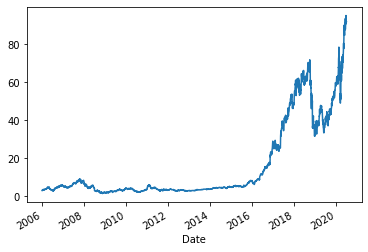

In [13]:
df_stk.drop(['Volume'],axis=1,inplace=True)
df_stk['Adj Close'].plot()

In [14]:
df_stk['Returns'] = np.log(df_stk[['Adj Close']]).diff().dropna()
df_stk.head()

,Open,High,Low,Close,Adj Close,Returns
Date,,,,,,
2006-01-03,3.064167,3.208333,3.054167,3.185000,2.922242,NaN
2006-01-04,3.209167,3.279167,3.175833,3.274167,3.004054,0.027611
2006-01-05,3.275000,3.354167,3.269167,3.348333,3.072100,0.022399
2006-01-06,3.386667,3.415833,3.254167,3.403333,3.122564,0.016293
2006-01-09,3.401667,3.516667,3.394167,3.498333,3.209726,0.027531


<AxesSubplot:xlabel='Date'>

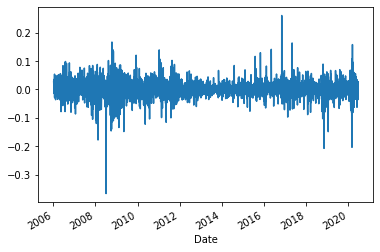

In [15]:
df_stk['Returns'].plot()

<AxesSubplot:>

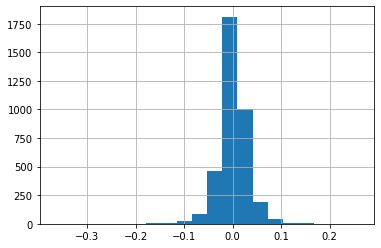

In [16]:
df_stk['Returns'].hist(bins=20)

In [17]:
df_stk['Returns'].describe()

count    3646.000000
mean        0.000945
std         0.030545
min        -0.367108
25%        -0.013310
50%         0.001139
75%         0.015712
max         0.260876
Name: Returns, dtype: float64

In [18]:
df_regOutput = assetPriceReg(df_stk)


                  CAPM       FF3        FF5    
-----------------------------------------------
Intercept      -0.0067*** -0.0075*** -0.0075***
               (0.0012)   (0.0011)   (0.0011)  
MKT            1.5120***  1.6305***  1.4925*** 
               (0.0707)   (0.0637)   (0.0684)  
SMB                       0.5429***  0.3230*** 
                          (0.1235)   (0.1222)  
HML                       -1.0400*** -0.7702***
                          (0.1092)   (0.1168)  
RMW                                  0.6162*   
                                     (0.3413)  
CMA                                  -1.5601***
                                     (0.3989)  
R-squared      0.5343     0.6073     0.6250    
R-squared Adj. 0.5333     0.6047     0.6209    
N              464        464        464       
Adjusted R2    0.5333     0.6047     0.6209    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [19]:
    import pandas_datareader.data as web  # module for reading datasets directly from the web
    
    # Reading in factor data
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
    df_factors['MKT'] = df_factors['MKT']/100
    df_factors['SMB'] = df_factors['SMB']/100
    df_factors['HML'] = df_factors['HML']/100
    df_factors['RMW'] = df_factors['RMW']/100
    df_factors['CMA'] = df_factors['CMA']/100
    
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
    df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns

    # Running CAPM, FF3, and FF5 models.
    FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [20]:
FF5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  XsRet   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.36e-95
Time:                        00:56:33   Log-Likelihood:                 1117.6
No. Observations:                 464   AIC:                            -2223.
Df Residuals:                     458   BIC:                            -2198.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0075      0.001     -7.034      0.000      -0.010      -0.005
MKT            1.4925      0.068     21.812      0.000       1.358       1.627
SMB            0.3230      0.122      2.644      0.008       0.084       0.562
HML           -0.7702      0.117     -6.592      0.000      -0.999      -0.541
RMW            0.6162      0.341      1.805      0.071      -0.053       1.285
CMA           -1.5601      0.399     -3.911      0.000      -2.342      -0.778
==============================================================================
Omnibus:                      275.665   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7075.563
Skew:                          -2.057   Prob(JB):                         0.00
Kurtosis:                      21.683   Cond. No.                         376.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

## Parameter Terminology

In general, we do not know the underlying true values of the coefficients β. We will denote $\widehat{\beta}$ the estimation of the unknown parameter β.

We note that we can talk about $\widehat{\beta}$ in two ways:

- $\widehat{\beta}$ as a concrete estimated value, or more generally, as a result. Then we say that $\widehat{\beta}$ is an estimate of β based on an observed data sample;

- $\widehat{\beta}$ as a random variable, or more generally, as a rule for calculating an estimate based on observed data. Then we say that $\widehat{\beta}$ is an estimator of β.

When we are talking about $\widehat{\beta}$ as an estimator, we can also talk about its mean, $\mathbb{E}(\widehat{\beta}_1)$ , variance $\mathbb{V}{\rm ar}(\widehat{\beta}_1)$ and distribution, which are very important when determining if a particular estimation method is better than an alternative one.

## Key assumptions in Regression Analysis

<p>Let our <em>(random) samples</em> of <span class="math inline">\(\epsilon\)</span>, <span class="math inline">\(X\)</span> and <span class="math inline">\(Y\)</span> be: <span class="math inline">\(\boldsymbol{\varepsilon} = (\epsilon_1, ..., \epsilon_N)^\top\)</span>, <span class="math inline">\(\mathbf{X} = (X_1,....,X_N)^\top\)</span>, and <span class="math inline">\(\mathbf{Y} = (Y_1, ..., Y_N)^\top\)</span>.</p>
<p>The required conditions are:</p>


<p>
<strong>(UR.1)</strong> The Data Generating Process (<strong>DGP</strong>), or in other words, the population, is described by a linear (<em>in terms of the coefficients</em>) model: <span class="math display"><span class="math display">\[Y = \beta_0 + \beta_1 X + \epsilon\]</span></span>
</p>
</div>

<p>Another example of a linear model is: <span class="math display">\[\log (Y) = \beta_0 + \beta_1 \dfrac{1}{X} + \epsilon \iff U = \beta_0 + \beta_1 V + \epsilon,\ \text{where}\ U = \log(Y),\ V = \dfrac{1}{X}\]</span> In a linear model <span class="math inline">\(\epsilon\)</span> and <span class="math inline">\(Y\)</span> are <strong>always dependent</strong>, thus <span class="math inline">\(\mathbb{C}{\rm ov} (Y, \epsilon) \neq 0\)</span>. However, <span class="math inline">\(\epsilon\)</span> may (or may not) depend on <span class="math inline">\(X\)</span>. This leads us to further requirements for <span class="math inline">\(\epsilon\)</span>.</p>


<p>
<strong>(UR.2)</strong> The error term <span class="math inline"><span class="math inline">\(\epsilon\)</span></span> has an expected value of zero, given any value of the explanatory variable: <span class="math display"><span class="math display">\[\mathbb{E}(\epsilon_i| X_j) = 0,\ \forall i,j = 1,...,N\]</span></span>
</p>
</div>


<p>This means that whatever are the observations, <span class="math inline">\(X_j\)</span>, the errors, <span class="math inline">\(\epsilon_j\)</span>, are on average 0. This also implies that <span class="math inline">\(\mathbb{E}(\epsilon_i X_i) = 0\)</span> and <span class="math inline">\(\mathbb{E}(\epsilon_i) = \mathbb{E}\left( \mathbb{E}\left( \epsilon_i | X_i\right) \right)=0\)</span>. An example would be the case, where <span class="math inline">\(X_j\)</span> and <span class="math inline">\(\epsilon_i\)</span> are independent r.v.’s and <span class="math inline">\(\mathbb{E}(\epsilon_i) = 0\)</span> <span class="math inline">\(\forall i,j = 1,...,N\)</span>. Furthermore, This property implies that:
<span class="math display">\[\mathbb{E}(Y_i|X_i) = \beta_0 + \beta_1 X_i\]</span>
On the other hand, if <span class="math inline">\(\mathbb{C}{\rm ov}(X_i, \epsilon_i) \neq 0\)</span>, then expressing the covariance as <span class="math inline">\(\mathbb{C}{\rm ov}(X_i, \epsilon_i) = \mathbb{E}\left[ (X_i - \mathbb{E}(X_i))(\epsilon_i - \mathbb{E}(\epsilon_i))\right] = \mathbb{E}\left[ (X_i - \mathbb{E}(X_i))\epsilon_i\right] = \mathbb{E} \left[ (X_i - \mathbb{E}(X_i))\mathbb{E}(\epsilon_i | X_i) \right] \neq 0\)</span>, which implies that <span class="math inline">\(\mathbb{E}(\epsilon_i| X_j) \neq 0\)</span>, i.e. assumption <strong>(UR.2)</strong> does not hold.</p>


<p>
<strong>(UR.3)</strong> The error term <span class="math inline"><span class="math inline">\(\epsilon\)</span></span> has the same variance given any value of the explanatory variable (i.e. homoskedasticity): <span class="math display"><span class="math display">\[\mathbb{V}{\rm ar} (\epsilon_i | \mathbf{X} ) = \sigma^2_\epsilon,\ \forall i = 1,..,N\]</span></span> and the error terms are not correlated across observations (i.e. no autocorrelation): <span class="math display"><span class="math display">\[\mathbb{C}{\rm ov} (\epsilon_i, \epsilon_j) = 0,\ i \neq j\]</span></span>
</p>
</div>
<p>This implies that the conditional variance-covariance matrix of a <em>vector</em> of disturbances <span class="math inline">\(\boldsymbol{\varepsilon}\)</span> is a unit (or identity) matrix, times a constant, <span class="math inline">\(\sigma^2_\epsilon\)</span>:

    
$\mathbb{V}{\rm ar}\left( \boldsymbol{\varepsilon} | \mathbf{X} \right) =
\begin{bmatrix}
\mathbb{V}{\rm ar} (\epsilon_1) & \mathbb{C}{\rm ov} (\epsilon_1, \epsilon_2) & ... & \mathbb{C}{\rm ov} (\epsilon_1, \epsilon_N) \\
\mathbb{C}{\rm ov} (\epsilon_2, \epsilon_1) & \mathbb{V}{\rm ar} (\epsilon_2) & ... & \mathbb{C}{\rm ov} (\epsilon_2, \epsilon_N) \\
\vdots & \vdots & \ddots & \vdots \\
\mathbb{C}{\rm ov} (\epsilon_N, \epsilon_1) & \mathbb{C}{\rm ov} (\epsilon_N, \epsilon_2) & ... & \mathbb{V}{\rm ar} (\epsilon_N)
\end{bmatrix} =
\sigma^2_\epsilon  \mathbf{I}$
    
    
This means that the disturbances $\epsilon_i$ and $\epsilon_j$ are independent $\forall i \neq j$ and independent of $\mathbf{X}$, thus:

$\mathbb{C}{\rm ov} (\epsilon_i, \epsilon_j | \mathbf{X} ) = \mathbb{E} (\epsilon_i \epsilon_j | \mathbf{X} ) = 0,\ \forall i \neq j.$
</p>


<div class="THEOREM">
<p>
<strong>(UR.4) (optional)</strong> The residuals are normal: <span class="math display"><span class="math display">\[\boldsymbol{\varepsilon} | \mathbf{X} \sim \mathcal{N} \left( \mathbf{0}, \sigma^2_\epsilon \mathbf{I} \right)\]</span></span>
</p>
</div>
<p>This <strong>optional condition</strong> simplifies some statistical properties of the parameter estimators.</p>
<p>We can combine the requirements and restate them as the following:</p>
<div class="THEOREM">
<p>
The Data Generating Process <span class="math inline"><span class="math inline">\(Y = \beta_0 + \beta_1 X + \epsilon\)</span></span> satisfies <strong>(UR.2)</strong> and <strong>(UR.3)</strong>, if: (conditionally on all <span class="math inline"><span class="math inline">\(\mathbf{X}\)</span></span>’s) <span class="math inline"><span class="math inline">\(\mathbb{E} (\epsilon_i) = 0\)</span></span>, <span class="math inline"><span class="math inline">\(\mathbb{V}{\rm ar}(\epsilon_i) = \sigma^2_\epsilon\)</span></span> and <span class="math inline"><span class="math inline">\(\mathbb{C}{\rm ov} (\epsilon_i, \epsilon_j) = 0\)</span></span>, <span class="math inline"><span class="math inline">\(\forall i \neq j\)</span></span> and <span class="math inline"><span class="math inline">\(\mathbb{C}{\rm ov} (\epsilon_i, X_j) = \mathbb{E} (\epsilon_i X_j) = 0\)</span></span>, <span class="math inline"><span class="math inline">\(\forall i,j\)</span></span>.
</p>
</div>
<p>The linear relationship <span class="math inline">\(Y = \beta_0 + \beta_1 X + \epsilon\)</span> is also referred as the <em>regression line</em> with an <em>intercept</em> <span class="math inline">\(\beta_0\)</span> and a <em>slope</em> <span class="math inline">\(\beta_1\)</span>. From <strong>(UR.2)</strong> we have that the regression line coincides with the expected value of <span class="math inline">\(Y_i\)</span>, given <span class="math inline">\(X_i\)</span>.</p>
<p>In general, we do not know the true coefficient <span class="math inline">\(\beta_0\)</span> and <span class="math inline">\(\beta_1\)</span> values but we would like to estimate them from our sample data, which consists of points <span class="math inline">\((X_i, Y_i)\)</span>, <span class="math inline">\(i = 1,...,N\)</span>. We would also like to use the data in the <em>best</em> way possible to obtain an <em>estimate of the regression</em>: <span class="math display">\[\widehat{Y} = \widehat{\beta}_0 + \widehat{\beta}_1 X\]</span></p>
</div>

## Properties of the OLS estimator

From the construction of the OLS estimators the following properties apply to the sample:

1. The sum (and by extension, the sample average) of the OLS residuals is zero:

$\begin{equation}
\sum_{i = 1}^N \widehat{\epsilon}_i = 0
\end{equation}$


<AxesSubplot:xlabel='Date'>

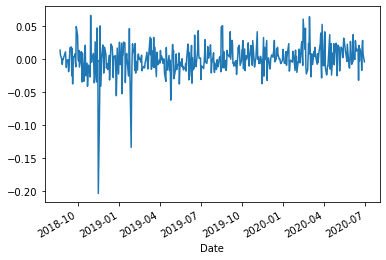

In [36]:
FF5.resid.plot()

In [37]:
FF5.resid.mean()

-2.6215588839535955e-16

2. The sample covariance between the regressors and the OLS residuals is zero:

$\begin{equation}
\sum_{i = 1}^N X_i \widehat{\epsilon}_i = 0
\end{equation}$

In [38]:
sum(FF5.resid.values * df_stock_factor['MKT'].values)

-2.6104877808019733e-16

In [39]:
np.cov(FF5.resid.values, df_stock_factor['MKT'].values)

array([[ 4.73913033e-04, -4.87890978e-19],
       [-4.87890978e-19,  2.95093793e-04]])

We see that both the sum and the sample covariance are very close to zero.

<ol start="3" style="list-style-type: decimal">
<li>The point <span class="math inline">\((\overline{X}, \overline{Y})\)</span> is <strong>always on the OLS regression line</strong> - if we calculate <span class="math inline">\(\widehat{\beta}_0 + \widehat{\beta}_1 \overline{X}\)</span>, the resulting value would be equal to <span class="math inline">\(\overline{Y}\)</span>.</li>
</ol>

However, these properties are not the only ones, which justify the use of the OLS method, instead of some other competing estimator. The main advantage of the OLS estimators can be summarized by the following Gauss-Markov theorem:

## Gauss-Markov theorem

<p>
Under the assumption that the conditions <strong>(UR.1) - (UR.3)</strong> hold true, the OLS estimators <span class="math inline"></span> and <span class="math inline"><span class="math inline">\(\widehat{\beta}\)</span></span> are <strong>BLUE</strong> (<strong>B</strong>est <strong>L</strong>inear <strong>U</strong>nbiased <strong>E</strong>stimator) and <strong>Consistent</strong>.
</p>

## What is an Estimator?


<p> An <strong>estimator</strong> is a rule that can be applied to any sample of data to produce an <strong>estimate</strong>. In other words the <strong>estimator</strong> is the rule and the <strong>estimate</strong> is the result.</p>

<p>The remaining components of the acronym <strong>BLUE</strong> are provided below.</p>

### OLS estimators are Linear


<p>From the specification of the relationship between <span class="math inline">\(\mathbf{Y}\)</span> and <span class="math inline">\(\mathbf{X}\)</span> (using the matrix notation for generality):
<span class="math display">\[
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
\]</span>
We see that the relationship is <strong>linear</strong> with respect to <span class="math inline">\(\mathbf{Y}\)</span>.</p>


### OLS estimators are Unbiased

<p>Using the matrix notation for the sample linear equations (<span class="math inline">\(\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}\)</span>) gives us the following:</p>

$\begin{aligned}
\widehat{\boldsymbol{\beta}} &= \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{Y} \\
&= \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \left( \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon} \right) \\
&= \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} + \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \\
&= \boldsymbol{\beta} + \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} 
\end{aligned}$


<p>If we take the expectation of both sides and use the law of total expectation:</p>
<p>
    $\begin{aligned}
\mathbb{E} \left[ \widehat{\boldsymbol{\beta}} \right] &= \boldsymbol{\beta} + \mathbb{E} \left[ \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \right] \\
&= \boldsymbol{\beta} + \mathbb{E} \left[ \mathbb{E} \left( \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \biggr\rvert \mathbf{X}\right)\right] \\
&= \boldsymbol{\beta} + \mathbb{E} \left[ \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbb{E} \left(  \boldsymbol{\varepsilon} | \mathbf{X}\right)\right] \\
&= \boldsymbol{\beta}
\end{aligned}$
    
    
since $\mathbb{E} \left( \boldsymbol{\varepsilon} | \mathbf{X}\right) = \mathbf{0}$ from <strong>(UR.2)</strong>.</p>
<p>We have shown that <span class="math inline">\(\mathbb{E} \left[ \widehat{\boldsymbol{\beta}} \right] = \boldsymbol{\beta}\)</span> - i.e., the OLS estimator <span class="math inline">\(\widehat{\boldsymbol{\beta}}\)</span> is an <strong>unbiased</strong> estimator of <span class="math inline">\(\boldsymbol{\beta}\)</span>.</p>
<p>Unbiasedness does not guarantee that the estimate we get with any particular sample is equal (or even very close) to <span class="math inline">\(\boldsymbol{\beta}\)</span>. It means that if we could <em>repeatedly</em> draw random samples from the population and compute the estimate each time, then the average of these estimates would be (very close to) <span class="math inline">\(\boldsymbol{\beta}\)</span>.</p>
</div>



### OLS estimators are Best (Efficient)

<p>When there is more than one unbiased method of estimation to choose from, that estimator which has the lowest variance is the <strong>best</strong>. In other words, we want to show that OLS estimators are <em>best</em> in the sense that <span class="math inline">\(\widehat{\boldsymbol{\beta}}\)</span> are <strong>efficient</strong> estimators of <span class="math inline">\(\boldsymbol{\beta}\)</span> (i.e. they have the <strong>smallest variance</strong>).</p>
<p>To do so we will calculate the variance - the average distance of an element from the average - as follows (remember that for OLS estimators, condition <strong>(UR.3)</strong> holds true):</p>
<p>From the proof of <strong>unbiasedness</strong> of the OLS we have that:
<span class="math display">\[
\begin{aligned}
\widehat{\boldsymbol{\beta}} =  \boldsymbol{\beta} + \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \Longrightarrow \widehat{\boldsymbol{\beta}} - \boldsymbol{\beta} = \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} 
\end{aligned}
\]</span>
Which we can then use this expression for calculating the <strong>variance-covariance matrix</strong> of the OLS estimator:
    
$\begin{aligned}
\mathbb{V}{\rm ar} (\widehat{\boldsymbol{\beta}}) &= \mathbb{E} \left[(\widehat{\boldsymbol{\beta}} - \mathbb{E}(\widehat{\boldsymbol{\beta}}))(\widehat{\boldsymbol{\beta}} - \mathbb{E}(\widehat{\boldsymbol{\beta}}))^\top \right] \\
&= \mathbb{E} \left[(\widehat{\boldsymbol{\beta}} - \boldsymbol{\beta})(\widehat{\boldsymbol{\beta}} - \boldsymbol{\beta})^\top \right] \\
&= \mathbb{E} \left[  \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon}  \left( \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \right)^\top \right] \\
&= \mathbb{E} \left[  \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \boldsymbol{\varepsilon} \boldsymbol{\varepsilon}^\top \mathbf{X} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \right] \\
&= \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top  \mathbb{E} \left[  \boldsymbol{\varepsilon} \boldsymbol{\varepsilon}^\top\right]  \mathbf{X} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \\
&= \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top  \left(\sigma^2 \mathbf{I} \right)  \mathbf{X} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \\
&= \sigma^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{X} \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1} \\
&= \sigma^2 \left( \mathbf{X}^\top  \mathbf{X}\right)^{-1}
\end{aligned}$


### Estimating the variance parameter of the error term


<p>We see an immediate problem from the OLS estimator variance formulas - we do not know the true error variance <span class="math inline">\(\sigma^2\)</span>. However, we can estimate it by calculating the <strong>sample</strong> residual variance:
<span class="math display">\[
\widehat{\sigma}^2 = s^2 = \dfrac{\widehat{\boldsymbol{\varepsilon}}^\top \widehat{\boldsymbol{\varepsilon}}}{N - k} = \dfrac{1}{N-k} \sum_{i = 1}^N \widehat{\epsilon}_i^2
\]</span></p>

<p>Note that this is an <strong>estimated variance</strong>. Nevertheless, it is a key component in assessing the accuracy of the parameter estimates (when calculating test statistics and confidence intervals).</p>
<p>Since we estimate <span class="math inline">\(\widehat{\boldsymbol{\beta}}\)</span> from the a random sample, the estimator <span class="math inline">\(\widehat{\boldsymbol{\beta}}\)</span> is a random variable as well. We can measure the uncertainty of <span class="math inline">\(\widehat{\boldsymbol{\beta}}\)</span> via its standard deviation. This is the <em>standard error</em> of our estimate of <span class="math inline">\(\boldsymbol{\beta}\)</span>:</p>

<p>
The square roots of the diagonal elements of the variance-covariance matrix <span class="math inline"><span class="math inline">\(\widehat{\mathbb{V}{\rm ar}} (\widehat{\boldsymbol{\beta}})\)</span></span> are called <strong>the standard errors (se)</strong> of the corresponding OLS estimators <span class="math inline"><span class="math inline">\(\widehat{\boldsymbol{\beta}}\)</span></span>, which we use to <strong>estimate</strong> the standard <strong>deviation</strong> of <span class="math inline"><span class="math inline">\(\widehat{\beta}_i\)</span></span> from <span class="math inline"><span class="math inline">\(\beta_i\)</span></span> <span class="math display"><span class="math display">\[
\text{se}(\widehat{\beta}_i) = \sqrt{\widehat{\mathbb{V}{\rm ar}} (\mathbf{\widehat{\beta}_i})}
\]</span></span>
</p>
<p>
The standard errors describe the accuracy of an estimator (the smaller the better). The standard errors are measures of the <strong>sampling variability</strong> of the least squares estimates <span class="math inline"><span class="math inline">\(\widehat{\beta}_1\)</span></span> and <span class="math inline"><span class="math inline">\(\widehat{\beta}_2\)</span></span> in <strong>repeated samples</strong> - if we collect a number of different data samples, the OLS estimates will be different for each sample. As such, the OLS estimators are <strong>random variables</strong> and have their own distribution.
</p>

In [40]:
FF5.bse

# Note: the b in bse stands for the parameter vector β, and se - standard errors.

Intercept    0.001069
MKT          0.068412
SMB          0.122155
HML          0.116806
RMW          0.341355
CMA          0.398788
dtype: float64

## Confidence Intervals

In this section we will introduce the notion of interval estimation - a procedure for creating ranges of values, called confidence intervals, in which the unknown parameters are likely to be located. Confidence interval creation procedures rely heavily on (UR.4) assumption.

In [41]:
FF5.conf_int()

,0,1
Intercept,-0.009595,-0.005404
MKT,1.357822,1.625993
SMB,0.082963,0.561804
HML,-0.998712,-0.540839
RMW,-0.051692,1.286393
CMA,-2.346915,-0.783695


## Hypothesis Testing

in practice, we usually want to answer very specific questions about the effects of specific variables:

Does income affect expenditure?
Do more years in education lead to an increase in wage?
Hypothesis tests use the information about a parameter from the sample data to answer such yes/no questions (though not necessarily in such strong certainty).

### The Null Hypothesis

<p>The <strong>null hypothesis</strong> is denoted by <span class="math inline">\(H_0\)</span>, and for the univariate regression can be stated as:
<span class="math display">\[
H_0: \beta_i = c
\]</span>
where <span class="math inline">\(c\)</span> is a constant value, which we are interested in. When testing the null hypothesis, we may either <strong>reject</strong> or <strong>fail to reject</strong> the null hypothesis.</p>
<div class="THEOREM">
<p>
<strong>The null hypothesis, is presumed to be true, until the data provides sufficient evidence that it is not.</strong>
</p>
</div>
<p>If we fail to reject the null hypothesis, it does not mean the null hypothesis is true. A hypothesis test does not determine which hypothesis is <strong>true</strong>, or which is most likely: it only assesses whether available evidence exists to <strong>reject</strong> the null hypothesis.</p>
</div>


###  The Alternative Hypothesis

<p>Once, we state our null hypothesis, we must test it <em>against</em> and <strong>alternative hypothesis</strong>, denoted <span class="math inline">\(H_1\)</span>.</p>
<p>For the null hypothesis <span class="math inline">\(H_0: \beta_i = c\)</span> we may specify the alternative hypothesis in thee possible ways:</p>
<ul>
<li><span class="math inline">\(H_1: \beta_i &gt; c\)</span> - rejecting <span class="math inline">\(H_0\)</span>, leads us to “accept” the conclusion that <span class="math inline">\(\beta_i &gt; c\)</span>. Economic theory frequently provides information about the <strong>signs</strong> of the variable parameters. For example: economic theory strongly suggests that food expenditure will rise if income increases, so we would test <span class="math inline">\(H_0: \beta_{INCOME} = 0\)</span> against <span class="math inline">\(H_1: \beta_{INCOME} &gt; 0\)</span>.</li>
<li><span class="math inline">\(H_1: \beta_i &lt; c\)</span> - rejecting <span class="math inline">\(H_0\)</span>, leads us to “accept” the conclusion that <span class="math inline">\(\beta_i &lt; c\)</span>.</li>
<li><span class="math inline">\(H_1: \beta_i \neq c\)</span> - rejecting <span class="math inline">\(H_0\)</span>, leads us to “accept” the conclusion that <span class="math inline">\(\beta_i\)</span> is either greater <em>or</em> smaller than <span class="math inline">\(c\)</span>.</li>
</ul>
<div class="THEOREM">
<p>
<strong>We usually talk about hypothesis testing in terms of the null</strong>, i.e. we either <strong>reject</strong> or <strong>fail to reject</strong> the null - we <strong>never</strong> <em>accept</em> the null. As such, if we reject the null, then we “accept” (i.e. we are left with) the alternative.
</p>
</div>
</div>



### The Test Statistic


<p>The <strong>test statistic</strong> is calculated under the null hypothesis (i.e. assuming the null hypothesis is <em>true</em>). Under the null hypothesis the distribution of the statistic is <em>known</em>. Based on the value of the test statistic, we decide whether to reject, or fail to reject the null.</p>
<p>Under the null hypothesis <span class="math inline">\(H_0: \beta_i = c\)</span> of our univariate regression model, we can calculate the following <strong><span class="math inline">\(t\)</span>-statistic</strong>:
<span class="math display">\[
t_i = \dfrac{\widehat{\beta}_i - c}{\text{se}(\widehat{\beta}_i)} \sim t_{(N-2)}
\]</span>
If the null hypothesis is <em>not true</em>, then the <span class="math inline">\(t\)</span>-statistic does not have a <span class="math inline">\(t\)</span>-distribution with <span class="math inline">\(N-2\)</span> degrees of freedom, but some other distribution.</p>
</div>


### The Rejection Regions
<p>The <strong>rejection region</strong> consists of values that have low probability of occurring when the null hypothesis is true. The rejection region depends on the specification of the alternative hypothesis. If the calculated <em>test statistic</em> value falls in the rejection region (i.e. an unlikely event to occur under the null), then it is unlikely that the null hypothesis is holds.</p>
<p>The size of the rejection regions are determined by choosing a <strong>level of significance <span class="math inline">\(\alpha\)</span></strong> - a probability of the unlikely event, usually <span class="math inline">\(0.01\)</span>, <span class="math inline">\(0.05\)</span>, <span class="math inline">\(0.1\)</span>.</p>
<div class="THEOREM">
<p>
To determine, whether to reject the null hypothesis or not, we will compare the calculated <span class="math inline"><span class="math inline">\(t\)</span></span>-statistic <span class="math inline"><span class="math inline">\(t_i\)</span></span> to the critical value <span class="math inline"><span class="math inline">\(t_c\)</span></span>.
</p>
</div>


### Type I and Type II Errors
<p>When deciding whether to reject the null hypothesis or not, we may commit one of two types of errors:</p>
<ul>
<li><strong>Type I error</strong> - <strong>to reject the null hypothesis when it is true</strong>. The probability of committing Type I error is <span class="math inline">\(\mathbb{P}(H_0 \text{ rejected} | H_0 \text{ is true}) = \alpha\)</span>. Any time we reject the null hypothesis, it is possible that we have made such an error. We can specify the amount of Type I error, that we can tolerate, by setting the level of significance <span class="math inline">\(\alpha\)</span>. If we want to avoid making a <strong>Type I</strong> error, then we set <span class="math inline">\(\alpha\)</span> to a very small value.</li>
<li><strong>Type II error</strong> - <strong>to not reject the null hypothesis when it is false</strong>. We cannot directly calculate the probability of this type of error, since it depends on the unknown parameter <span class="math inline">\(\beta_i\)</span>. However, we do know that by making <span class="math inline">\(\alpha\)</span> smaller we increase the probability of <strong>Type II</strong> error.</li>
</ul>
<p>It is believed that a <strong>Type I</strong> error is more severe, hence, it is recommended to make the probability <span class="math inline">\(\alpha\)</span> small.</p>
</div>
</div>


### The <span class="math inline">\(p\)</span>-value

<p>When reporting the outcome of statistical hypothesis tests, we usually report the <span class="math inline">\(p\)</span>-value of the test. The <span class="math inline">\(p\)</span>-value is defined as the probability, under the null hypothesis, of obtaining a result, which is equal to, or more extreme, than what was actually observed.</p>
<p>Having the <span class="math inline">\(p\)</span>-value allows us to easier determine the outcome of the test, as we do not need to directly compare the critical values.</p>
<div class="THEOREM">
<ul>
<li>
If <span class="math inline"><span class="math inline">\(p \leq \alpha\)</span></span>, we <strong>reject</strong> <span class="math inline"><span class="math inline">\(H_0\)</span></span>.
</li>
<li>
If <span class="math inline"><span class="math inline">\(p \geq \alpha\)</span></span>, we <strong>do not reject</strong> <span class="math inline"><span class="math inline">\(H_0\)</span></span>.
</li>
</ul>
</div>
</div>

In [42]:
FF5.pvalues

Intercept     2.305164e-12
MKT          1.962882e-105
SMB           8.312035e-03
HML           4.392977e-11
RMW           7.052368e-02
CMA           8.667348e-05
dtype: float64

## Goodness-Of-Fit

<p>In order to have an accurate prediction of <span class="math inline">\(Y\)</span>, we hope that the independent variable <span class="math inline">\(X\)</span> helps us <em>explain</em> as much variation in <span class="math inline">\(Y\)</span> as possible (hence why <span class="math inline">\(X\)</span> is usually referred to as an <em>explanatory</em> variable). Ideally, the variance of <span class="math inline">\(X\)</span> will help <em>explain</em> the variance in <span class="math inline">\(Y\)</span>. Having said that, we would like to have a way to <strong>measure</strong> just how <em>good</em> our model is - how much of the variation in <span class="math inline">\(Y\)</span> can be explained by the variation in <span class="math inline">\(X\)</span> using our model - we need a <strong>goodness-of-fit</strong> measure.</p>
<p>Another way to look at it is - a <strong>goodness-of-fit</strong> measure aims to quantify how well the estimated model <em>fits</em> the data. Fortunately, there are many ways to measure the goodness-of-fit of the estimated model.</p>

### R-squared, <span class="math inline">\(R^2\)</span>


<p>It is often useful to compute a number that summarizes how well the OLS regression fits the data. This measure is called the <strong>coefficient of determination</strong>, <span class="math inline">\(R^2\)</span>, which is the ratio of explained variation, compared to the total variation, i.e. the proportion of variation in <span class="math inline">\(Y\)</span> that is explained by <span class="math inline">\(X\)</span> in our regression model:
<span class="math display">\[
R^2 = \dfrac{\text{ESS}}{\text{TSS}} = 1 - \dfrac{\text{RSS}}{\text{TSS}}
\]</span></p>
<ul>
<li>The closer <span class="math inline">\(R^2\)</span> is to <span class="math inline">\(1\)</span>, the closer the sample values of <span class="math inline">\(Y_i\)</span> are to the fitted values <span class="math inline">\(\widehat{Y}\)</span> of our regression. Ir <span class="math inline">\(R^2 = 1\)</span>, then all the sample data fall exactly on the fitted regression. In such a case our model would be a <em>perfect fit</em> for our data.</li>
<li>If the sample data of <span class="math inline">\(Y\)</span> and <span class="math inline">\(X\)</span> do not have a linear relationship, then <span class="math inline">\(R^2 = 0\)</span> of a univariate regression.</li>
<li>Values <span class="math inline">\(0 &lt; R^2 &lt; 1\)</span>, the interpretation of <span class="math inline">\(R^2\)</span> is as <em>the proportion of the variation in <span class="math inline">\(Y\)</span> around its mean, that is explained by the regression model</em>. For example <span class="math inline">\(R^2 = 0.17\)</span> means that <span class="math inline">\(17\%\)</span> of the variation in <span class="math inline">\(Y\)</span> is explained by <span class="math inline">\(X\)</span>.</li>
</ul>
<div class="THEOREM">
<p>
When comparing <span class="math inline"><span class="math inline">\(\text{RSS}\)</span></span> of different models, we want to choose the model, which better fits our data. If we want to choose a model based on its <span class="math inline"><span class="math inline">\(R^2\)</span></span> value we should note a couple of things:
</p>
<ul>
<li>
<p>
<span class="math inline"><span class="math inline">\(R^2\)</span></span> comparison <strong>is not valid</strong> for comparing models, that <strong>do not have have the same transformation of the dependent variable</strong>, for example two models - one with <span class="math inline"><span class="math inline">\(Y\)</span></span> and the other with <span class="math inline"><span class="math inline">\(\log(Y)\)</span></span> dependent variables cannot be compared via <span class="math inline"><span class="math inline">\(R^2\)</span></span>.
</p>
</li>
<li>
<p>
<span class="math inline"><span class="math inline">\(R^2\)</span></span> does not measure the predictability power of the model. For example, a linear model may be a good fit for the data, but its forecasts may not make economic sense (e.g. forecasting negative wage for low values of years in education via a simple linear model).
</p>
</li>
<li>
<p>
<span class="math inline"><span class="math inline">\(R^2\)</span></span> is based on the sample data, so it says nothing whether our model is close to the true population DGP.
</p>
</li>
<li>
<p>
<span class="math inline"><span class="math inline">\(R^2\)</span></span> may be low if: the error variance, <span class="math inline"><span class="math inline">\(\sigma^2\)</span></span>, is large; or if the variance of <span class="math inline"><span class="math inline">\(X\)</span></span> is small.
</p>
</li>
<li>
<p>
<span class="math inline"><span class="math inline">\(R^2\)</span></span> may be large even if the model is wrong. For example, even if the true relationship is non-linear, a linear model may have a larger <span class="math inline"><span class="math inline">\(R^2\)</span></span>, compared to the quadratic, or even the log-linear model.
</p>
</li>
<li>
<p>
On the other hand, <strong>the goodness-of-fit</strong> of the model does not depend on the unit of measurement of our variables (e.g. dollars vs thousands of dollars). Furthermore, comparisons of <span class="math inline"><span class="math inline">\(R^2\)</span></span> are valid, if we compare a simple linear model to a linear-log model, as they both have the same dependent variable, <span class="math inline"><span class="math inline">\(Y\)</span></span>.
</p>
</li>
</ul>
<p>
In any case, a model should not be chosen <strong>only</strong> on the basis of model fit with <span class="math inline"><span class="math inline">\(R^2\)</span></span> as the criterion.
</p>
</div>

In [43]:
FF5.rsquared

0.6247845025614316

In [44]:
FF5.rsquared_adj

0.6206971877745191

### Regression Diagnostics and Graphics

<p>In many cases while carrying out statistical/econometric analysis, we are not sure, whether we have correctly specified our model. As we have seen, the <span class="math inline">\(R^2\)</span> can be artificially small (or large), regardless of the specified model. As such, there are a number of regression diagnostics and specification tests.</p>
<p>For the univariate regression, the most crucial assumptions come from <strong>(UR.3)</strong> and <strong>(UR.4)</strong>, namely:</p>
<ul>
<li><span class="math inline">\(\mathbb{V}{\rm ar} (\epsilon_i | \mathbf{X} ) = \sigma^2_\epsilon,\ \forall i = 1,..,N\)</span></li>
<li><span class="math inline">\(\mathbb{C}{\rm ov} (\epsilon_i, \epsilon_j) = 0,\ i \neq j\)</span></li>
<li><span class="math inline">\(\boldsymbol{\varepsilon} | \mathbf{X} \sim \mathcal{N} \left( \mathbf{0}, \sigma^2_\epsilon \mathbf{I} \right)\)</span></li>
</ul>
<p>We note that the residuals are defined as:
    
    
$\begin{aligned}
\widehat{\boldsymbol{\varepsilon}} &= \mathbf{Y} - \widehat{\mathbf{Y} } \\
&= \mathbf{Y} - \mathbf{X} \widehat{\boldsymbol{\beta}} \\
&= \mathbf{Y} - \mathbf{X} \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{Y} \\
&= \left[ \mathbf{I} - \mathbf{X} \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \right]\mathbf{Y}
\end{aligned}$
    
   
Hence, for the OLS <strong>residuals</strong> (i.e. not the true unobserved errors) the expected value of the residuals is still zero:


$\begin{aligned}
\mathbb{E} \left( \widehat{\boldsymbol{\varepsilon}}| \mathbf{X} \right) &=  \mathbb{E} \left( \left[ \mathbf{I} - \mathbf{X} \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \right]\mathbf{Y} | \mathbf{X} \right)\\
&= \mathbb{E} \left( \left[ \mathbf{I} - \mathbf{X} \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \right] \left( \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon} \right) | \mathbf{X} \right) \\
&= \mathbf{X} \boldsymbol{\beta} + \mathbb{E} (\boldsymbol{\varepsilon}) - \mathbf{X} \boldsymbol{\beta} - \mathbf{X} \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbb{E} (\boldsymbol{\varepsilon}) \\
&= 0
\end{aligned}$


For simplicity, let $\widehat{\boldsymbol{\varepsilon}} = \left[ \mathbf{I} - \mathbf{H}\right]\mathbf{Y}$, where $\mathbf{H}\ = \mathbf{X} \left( \mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top$.</p>


<p>Consequently, the variance-covariance matrix of the residuals is:</p>

$\begin{equation}
\begin{aligned}
\mathbb{V}{\rm ar} \left( \widehat{\boldsymbol{\varepsilon}}| \mathbf{X}\right) &= \mathbb{V}{\rm ar} \left( \left[ \mathbf{I} - \mathbf{H}\right]\mathbf{Y}|\mathbf{X}\right) \\
&= \left[ \mathbf{I} - \mathbf{H}\right]\mathbb{V}{\rm ar} \left( \mathbf{Y} | \mathbf{X}\right) \left[ \mathbf{I} - \mathbf{H}\right]^\top \\
&= \left[ \mathbf{I} - \mathbf{H}\right] \sigma^2 \left[ \mathbf{I} - \mathbf{H}\right]^\top \\
&= \sigma^2 \left[ \mathbf{I} - \mathbf{H}^\top - \mathbf{H} + \mathbf{H} \mathbf{H}^\top\right] \\
&= \sigma^2 \left[ \mathbf{I} - \mathbf{H}^\top - \mathbf{H} + \mathbf{H}^\top\right] \\
&= \sigma^2 \left[ \mathbf{I} - \mathbf{H}\right]
\end{aligned}
\end{equation}$


<div class="THEOREM">
<p>
This result shows an important distinction of the residuals from the errors - the residuals may have different variances (which are the diagonal elements of <span class="math inline"><span class="math inline">\(\mathbb{V}{\rm ar} \left( \widehat{\boldsymbol{\varepsilon}}| \mathbf{X}\right)\)</span></span>), even if the true errors (which affect the process <span class="math inline"><span class="math inline">\(\mathbf{Y}\)</span></span>) all have the same variance <span class="math inline"><span class="math inline">\(\sigma^2\)</span></span>.
</p>
</div>
<p>The variance for the fitted values is smallest for observations near the mean and the largest for values, which deviate the most from the process mean.</p>


### Residual Diagnostic Plots

<p>One way to examine the adequacy of the model is to visualize the residuals. There are a number of ways to do this:</p>
<ul>
<li>Plotting the residuals <span class="math inline">\(\widehat{\epsilon}_i\)</span> against the fitted values <span class="math inline">\(\widehat{Y}_i\)</span>;</li>
<li>Plotting the residuals <span class="math inline">\(\widehat{\epsilon}_i\)</span> against <span class="math inline">\(X_i\)</span></li>
<li>Plotting the residual Q-Q plot, histogram or boxplot.</li>
</ul>
<p>In all cases, if there are no violations of our <strong>(UR.2)</strong> or <strong>(UR.3)</strong> assumptions - the plots should reveal <strong>no patterns</strong>. The residual histogram, Q-Q plot should be approximately normal so that our assumption <strong>(UR.4)</strong> holds.</p>
<p>As we are not guaranteed to specify a correct functional form, residual plots offer a great insight on what possible functional form we may have missed.</p>
<p>We should note that when having multiple models, it is only meaningful to compare the residuals of models with the same dependent variable. For example, comparing the residuals of a linear-linear model (with <span class="math inline">\(Y\)</span>) and of a log-linear model (with <span class="math inline">\(\log(Y)\)</span>) is <strong>not</strong> meaningful as they have different value scales.</p>
<div class="THEOREM">
<p>
Transforming the dependent or the independent variables may help to alleviate some of the problems of the residuals:
</p>
<ul>
<li>
If nonlinearities are present in the residual plots - we must firstly account for them, and only after can we check, whether the errors have a constant variance.
</li>
<li>
Transforming <span class="math inline"><span class="math inline">\(\mathbf{Y}\)</span></span> primarily aims to help with problems with the error terms (and may help with non-linearity);
</li>
<li>
Transforming <span class="math inline"><span class="math inline">\(\mathbf{X}\)</span></span> primarily aims to help with correcting for non-linearity;
</li>
<li>
Sometimes transforming <span class="math inline"><span class="math inline">\(\mathbf{X}\)</span></span> is enough to account for non-linearity and have normally distributed errors, while transforming <span class="math inline"><span class="math inline">\(\mathbf{Y}\)</span></span> may account for non-linearity but might make the errors non-normally distributed.
</li>
<li>
Other times, transforming <span class="math inline"><span class="math inline">\(\mathbf{X}\)</span></span> does not help account for the nonlinear relationship at all;
</li>
</ul>
</div>
<p>Remember that the Q-Q plot plots quantiles of the data versus quantiles of a distribution. If the observations come from a normal distribution we would expect the observed order statistics plotted against the expected (theoretical) order statistics to form an approximately straight line.</p>

In [ ]:
!pip uninstall statsmodels
!pip install statsmodels


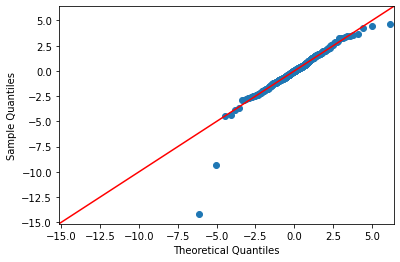

In [21]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats

fig = sm.qqplot(FF5.resid.values, stats.t, distargs=(6,), fit=True, line="45")
plt.show()


## Residual Heteroskedasticity


<p>If <span class="math inline">\(\mathbb{V}{\rm ar} (\epsilon_i | \mathbf{X} ) = \sigma^2_\epsilon,\ \forall i = 1,..,N\)</span>, we say that the residuals are <strong>homoskedastic</strong>. If this assumption is violated, we say that the residuals are <strong>heteroskedastic</strong> - that is, their variance is not constant throughout observations.</p>
<div class="THEOREM">
<p>
The consequences of heteroskedasticity are as follows:
</p>
<ul>
<li>
OLS parameters remain <strong>unbiased</strong>;
</li>
<li>
OLS estimates are no longer efficient (i.e. they no longer have the smallest variance). The reason for this is that OLS gives equal weight to all observations in the data, when in fact, observation with larger error variance contain less information, compared to observations with smaller error variance;
</li>
<li>
The variance estimate of the residuals <strong>is biased</strong>, and hence the standard errors are <strong>biased</strong>. This in turn leads to a bias in test statistics and confidence intervals.
</li>
<li>
Because of standard error bias, we may fail to reject the null hypothesis whether <span class="math inline"><span class="math inline">\(\beta_i = 0\)</span></span> in our estimated model, when the null hypothesis is actually false (i.e. making a Type II error).
</li>
</ul>
<p>
There are a few possible corrections to account for heteroskedasticity:
</p>
<ul>
<li>
Take logarithms of the data, this may be able to help <strong>linearize</strong> the data and in turn, the residuals;
</li>
<li>
Apply a different estimation method. We will examine this later on, but one possibility is to use a <strong>Weighted Least Squares</strong> estimation method, which gives different observations different weights and allows to account for a non-constant variance;
</li>
<li>
It is possible to correct the the biased standard errors for heteroskedasticity. This would leave the OLS estimates unchanged. <a href="https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors">White’s heteroskedasticity-consistent standard errors</a> (or, robust standard errors) give a consistent variance estimator.
</li>
</ul>
</div>

<p>There are a number of methods to test for the presence of heteroskedasticity. Some of the tests are:</p>
<ul>
<li><strong>Goldfeld–Quandt Test</strong>. It divides the dataset into two subsets. The subsets are specified so that the observations for which the explanatory variable takes the lowest values are in one subset, and the highest values - in the other subset. The subsets are not necessarily of equal size, nor do they contain all the observations between them. The test statistic used is the ratio of the mean square residual errors for the regressions on the two subsets. This test statistic corresponds to an F-test of equality of variances. The Goldfeld–Quandt test requires that data be <strong>ordered</strong> along a known explanatory variable, from lowest to highest.</li>
</ul>
<p>If the error structure depends on an unknown variable or an unobserved variable the Goldfeld–Quandt test provides little guidance. Also, error variance must be a monotonic function of the specified explanatory variable. For example, when faced with a quadratic function mapping the explanatory variable to error variance the Goldfeld–Quandt test may improperly accept the null hypothesis of homoskedastic errors.</p>
<p>Unfortunately the Goldfeld–Quandt test is not very robust to specification errors. The Goldfeld–Quandt test detects non-homoskedastic errors but cannot distinguish between heteroskedastic error structure and an underlying specification problem such as an incorrect functional form or an omitted variable.</p>
<ul>
<li><p><strong>Breusch–Pagan Test</strong>. After estimating the linear regression <span class="math inline">\(Y = \beta_0 + \beta_1 X + \epsilon\)</span>, calculate the model residuals <span class="math inline">\(\widehat{\epsilon}_i\)</span>. The OLS assumptions state that the residual variance does not depend on the independent variables <span class="math inline">\(\mathbb{V}{\rm ar} (\epsilon_i | \mathbf{X} ) = \sigma^2_\epsilon\)</span>. If this assumptions is not true, then there may be a linear relationship between <span class="math inline">\(\widehat{\epsilon}_i^2\)</span> and <span class="math inline">\(X_i\)</span>. So, the Breush-Pagan test is the based on the following regression:
<span class="math display">\[
\widehat{\epsilon}_i^2 = \gamma_0 + \gamma_1 X_i + v_i
\]</span>
The hypothesis tests is:

$\begin{aligned}
H_0&: \gamma_1 = 0 \text{ (residuals are homoskedastic)}\\
H_1&: \gamma_1 \neq 0 \text{ (residuals are heteroskedastic)}
\end{aligned}$

It is a chi-squared test, where the test statistic:
$
LM = N \cdot R^2_{\widehat{\epsilon}}
$
is distributed as $\chi^2_1$ under the null. Here $R^2_{\widehat{\epsilon}}$is the R-square of the squared residual regression. One weakness of the BP test is that it assumes that the heteroskedasticity is a <strong>linear</strong> relationship of the independent variables. If we fail to reject the null hypothesis, we still do not rule out the possibility of a non-linear relationship between the independent variables and the error variance.</p></li>
<li><p><strong>White Test</strong> is more generic than the BP test as it allows the independent variables to have a nonlinear effect on the error variance. For example, a combination of linear, quadratic and cross-products of the independent variables. It is a more commonly used test for homoskedasticity. The test statistic is calculated the same way as in <strong>BP</strong> test:
<span class="math display">\[
LM = N \cdot R^2_{\widehat{\epsilon}}
\]</span>
the difference from <strong>BP</strong> is that the squared residual model, from which we calculate <span class="math inline">\(R^2_{\widehat{\epsilon}}\)</span>, may be nonlinear. A shortcoming of the White test is that it can lose its power if the model has many exogenous variables.</p></li>
</ul>

In [22]:
import statsmodels.stats.diagnostic as sm_diagnostic

# Breusch–Pagan Test
sm_diagnostic.het_breuschpagan(resid = FF5.resid.values, exog_het = sm.add_constant(FF5.resid.values))

(94.90890408824038,
 1.9935113331602095e-22,
 118.79970601959461,
 8.966508040873986e-25)

In [23]:
# White Test
print(sm_diagnostic.het_white(resid = FF5.resid.values, exog = sm.add_constant(FF5.resid.values)))

(464.0, 1.7525894717410334e-101, 1.0104392007997422e+29, 0.0)


## Residual Autocorrelation

<p>If <span class="math inline">\(\mathbb{C}{\rm ov} (\epsilon_i, \epsilon_j) \neq 0\)</span> for some <span class="math inline">\(i \neq j\)</span>, then the errors are correlated. Autocorrelation is frequently encountered in time-series models.</p>

<br>
Assume that our model is defined as follows:
</div>

<p><span class="math display">\[
\begin{aligned}
Y_t = \beta_0 + \beta_1 X_t + \epsilon_t \\
\epsilon_t = \rho \epsilon_{t-1} + u_t,\ |\rho| &< 1,\ u_t \sim \mathcal{N}(0, \sigma^2)
\end{aligned}
\]</span>
Then we say that the model has <strong>autocorrelated</strong>, or <strong>serially correlated</strong> errors.</p>
<p>In this case, we have that:
<span class="math display">\[
\mathbb{C}{\rm ov}(\epsilon_t, \epsilon_{t-1}) = \mathbb{C}{\rm ov}(\rho \epsilon_{t-1} + u_t, \epsilon_{t-1}) = \rho \mathbb{C}{\rm ov}(\epsilon_{t-1},\epsilon_{t-1}) = \rho \sigma^2 \neq 0
\]</span>
Estimating the coefficients via OLS and ignoring the violation will still result in unbiased and consistent OLS estimators. However, the estimators are inefficient and the variance of the regression coefficients will be <strong>biased</strong>.</p>
<p>On the other hand, autocorrelation in errors may be a result of a misspecified model.</p>


<p>There are a number of tests for the presence of autocorrelation:</p>
<ul>
<li><p><strong>Durbin–Watson Test</strong> for the hypothesis:
<span class="math display">\[
\begin{aligned}
H_0&:\text{the errors are serially uncorrelated}\\
H_1&:\text{the errors follow a first order autoregressive process (i.e. autocorrelation at lag 1)}
\end{aligned}
\]</span>
The test statistic:
<span class="math display">\[
d = \dfrac{\sum_{i = 2}^N (\widehat{\epsilon}_i - \widehat{\epsilon}_{i-1})^2}{\sum_{i = 1}^N \widehat{\epsilon}_i^2}
\]</span>
The value of <span class="math inline">\(d\)</span> always lies between 0 and 4. <span class="math inline">\(d = 2\)</span> indicates no autocorrelation. If the Durbin–Watson statistic is not close to 2, there is evidence of a serial correlation.</p></li>
<li><p><strong>Breusch-Godfrey Test</strong> is a more flexible test, covering autocorrelation of higher orders and applicable whether or not the regressors include lags of the dependent variable. Consider the following linear regression:
<span class="math display">\[
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\]</span>
We then estimate the model via OLS and fit the following model on the residuals <span class="math inline">\(\widehat{\epsilon}_i\)</span>:
<span class="math display">\[
\widehat{\epsilon}_i = \alpha_0 + \alpha_1 X_i + \rho_1 \widehat{\epsilon}_{i - 1} + \rho_2 \widehat{\epsilon}_{i - 2} + ... + \rho_p \widehat{\epsilon}_{i - p} + u_t
\]</span>
and calculate its <span class="math inline">\(R^2\)</span> (R-squared), then testing the hypothesis:
<span class="math display">\[
\begin{aligned}
H_0&:\rho_1 = \rho_2 = ... = \rho_p = 0\\
H_1&:\rho_j \neq 0 \text{ for some } j
\end{aligned}
\]</span>
Under the null hypothesis the test statistic:
<span class="math display">\[
LM = (N-p)R^2 \sim \chi^2_p
\]</span></p></li>
</ul>

Note There is also the Ljung-Box Test for testing the null hypothesis of no autocorrelation of residuals.

In [24]:
from statsmodels.stats.stattools import durbin_watson
# Durbin–Watson Test
print(durbin_watson(FF5.resid.values))

1.8783699845436945


In [25]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
# Breusch-Godfrey Test
print(acorr_breusch_godfrey(FF5, nlags = 2))

(2.889760555209726, 0.2357743023303879, 1.454856925216001, 0.23451519609285382)


## Residual Normality Test

<p>The normality requirement is necessary if we want to obtain the correct <span class="math inline">\(p\)</span>-values and critical <span class="math inline">\(t\)</span>-values when testing the hypothesis that <span class="math inline">\(H_0: \beta_j = c\)</span>, especially for significance testing, with <span class="math inline">\(c = 0\)</span>. Assume that we want to test whether our residuals <span class="math inline">\(z_1,...,z_N\)</span> come from a normal distribution. The hypothesis can be stated as:
<span class="math display">\[
\begin{aligned}
H_0:\text{residuals follow a normal distribution}\\
H_1:\text{residuals do not follow a normal distribution}
\end{aligned}
\]</span></p>
<p>There are a number of normality tests, like:</p>
<ul>
<li><p><strong>Anderson-Darling Test</strong>. The test statistic is calculated as:
<span class="math display">\[
A^2 = -N - \sum_{i 1}^N \dfrac{2i-1}{N}\left[ \log(F(z_{(i)}) + \log\left(1 - F(z_{(N+1-i)}) \right)\right]
\]</span>
where <span class="math inline">\(z_{(i)}\)</span> are the <strong>ordered data</strong> and <span class="math inline">\(F(\cdot)\)</span> is the cumulative distribution function (cdf) of the distribution being tested (for the univariate regression residuals - we are usually interested in testing for the normal distribution). The test statistic is compared against the critical values from the normal distribution. <a href="https://web.archive.org/web/20150630110326/http://instatmy.org.my/downloads/e-jurnal%202/3.pdf">Empirical testing indicates</a> that the Anderson–Darling test is not quite as good as Shapiro-Wilk, but is better than other tests.</p></li>

<br>
<li><p><strong>Shapiro-Wilk Test</strong>. The test statistic is:
<span class="math display">\[
W = \dfrac{\left(\sum_{i = 1}^N a_i z_{(i)} \right)^2}{\sum_{i = 1}^N (z_i - \overline{z})^2}
\]</span>
where <span class="math inline">\(z_{(i)}\)</span> is the <span class="math inline">\(i\)</span>-th <strong>smallest value in the sample</strong> (i.e. the data are ordered). <span class="math inline">\(a_i\)</span> values are calculated using means, variances and covariances of <span class="math inline">\(z_{(i)}\)</span>. <span class="math inline">\(W\)</span> is compared against tabulated values of this statistic’s distribution. Small values of <span class="math inline">\(W\)</span> will lead to the rejection of the null hypothesis. Monte Carlo simulation has found that Shapiro–Wilk has the best power for a given significance, followed closely by Anderson–Darling when comparing the Shapiro–Wilk, Kolmogorov–Smirnov, Lilliefors and Anderson–Darling tests.</p></li>

<br>
<li><p><strong>Kolmogorov-Smirnov Test</strong>. The test statistic is given by:
<span class="math display">\[
D = \max\{ D^+; D^-\}
\]</span>
where:
<span class="math display">\[
\begin{aligned}
D^+ = \max_i \left( \dfrac{i}{N} - F(z_{(i)})\right)\\
D^- = \max_i \left( F(z_{(i)}) - \dfrac{i - 1}{N} \right)
\end{aligned}
\]</span>
where <span class="math inline">\(F(\cdot)\)</span> is the theoretical cdf of the distribution being tested (for the univariate regression residuals - we are usually interested in testing for the normal distribution). The <strong>Lilliefors Test</strong> is based on the Komogorov-Smirnov Test as a special case of this for the normal distribution.. For the normal distribution case, the test statistic is compared against the critical values from a normal distribution in order to determine the <span class="math inline">\(p\)</span>-value.</p></li>

<br>
<li><p><strong>Cramer–von Mises Test</strong> is an alternative to the Kolmogorov–Smirnov test. The test statistic:
<span class="math display">\[
W = N\omega^2 = \dfrac{1}{12N} + \sum_{i = 1}^N \left[ \dfrac{2i-1}{2N} - F(z_{(i)}) \right]^2
\]</span>
If this value is larger than the tabulated value, then the hypothesis that the data came from the distribution <span class="math inline">\(F\)</span> can be rejected.</p></li>

<br>
<li><p><strong>Jarque–Bera Test</strong> (valid for large samples). The statistic is calculated as:
<span class="math display">\[
JB = \dfrac{N-k+1}{6} \left(S^2 + \dfrac{(C - 3)^2}{4}\right)
\]</span>
where
<span class="math display">\[
\begin{aligned}
S = \dfrac{\dfrac{1}{N}\sum_{i = 1}^N (z_i - \overline{z})^3}{\left( \dfrac{1}{N}\sum_{i = 1}^N (z_i - \overline{z})^2 \right)^{3/2}}= \dfrac{\widehat{\mu}_3}{\widehat{\sigma}^3}\\
C = \dfrac{\dfrac{1}{N}\sum_{i = 1}^N (z_i - \overline{z})^4}{\left( \dfrac{1}{N}\sum_{i = 1}^N (z_i - \overline{z})^2 \right)^{2}} = \dfrac{\widehat{\mu}_4}{\widehat{\sigma}^4}\\
\end{aligned}
\]</span>
<span class="math inline">\(N\)</span> is the sample size, <span class="math inline">\(S\)</span> is the skewness and <span class="math inline">\(C\)</span> is kurtosis and <span class="math inline">\(k\)</span> is the number of regressors (i.e. the number of different independent variables <span class="math inline">\(X\)</span>, with <span class="math inline">\(k = 1\)</span> outside a regression context). <br> If the data comes from a normal distribution, then the <span class="math inline">\(JB\)</span> statistic has a chi-squared distribution with <strong>two degrees of freedom</strong>, <span class="math inline">\(\chi^2_2\)</span>.</p></li>

In [29]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(FF5.resid.values)

(7075.5627332582235, 0.0, -2.0568441457575295, 21.68301237474802)

## Standardized Residuals

<p>When we compare residuals for different observations, we want to take into account that their variances may be different. One way to account for this is to divide the residuals by an estimate the <strong>residuals standard deviation</strong>. This results in calculating the <strong>standardized</strong> residuals:
<span class="math display">\[
s_i = \dfrac{\widehat{\epsilon_i}}{\widehat{\sigma}\sqrt{1 - h_{ii}}}
\]</span>
where <span class="math inline">\(h_{ii}\)</span> is the <span class="math inline">\(i\)</span>-th diagonal element of <span class="math inline">\(\mathbf{H}\)</span>. Standardized residuals are useful in detecting outliers. Generally, any observation with a standardized residual greater than 2 in absolute value should be examined more closely.</p>